# Linear Regression Application Price Prediction Project

In this project, we will be doing app price prediction using linear regression models. The Play Store Apps data has enormous potential to drive app-making business to success. Hence by drawing meaningful insights from data by doing analysis it can really help developers improve their work.

In [773]:
#Needed Libraries 
from bs4 import BeautifulSoup
import requests
import math
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import scipy.stats as stats
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Scrapping

In [123]:
url = 'https://play.google.com/store/apps/collection/cluster?clp=0g4cChoKFHRvcHNlbGxpbmdfcGFpZF9HQU1FEAcYAw%3D%3D:S:ANO1ljLtt38&gsr=Ch_SDhwKGgoUdG9wc2VsbGluZ19wYWlkX0dBTUUQBxgD:S:ANO1ljJCqyI&gl=SA' 
response = requests.get(url,url2)

In [124]:
pages = response.text

In [125]:
soup = BeautifulSoup(page, "lxml")

In [128]:
divs =soup.find_all(class_='vU6FJ p63iDd') #all apps divs
headers = ["Price", "Reviews", "Rating", "Installs", "Category"] 
apps = []
for div in divs:
    # for each app visit it's page to get it's information 
    app_url = "https://play.google.com"+div.find(class_="JC71ub")["href"]
    response1 = requests.get(app_url)
    if response1.status_code != 200:
        continue
        
    page1 = response1.text
    soup1 = BeautifulSoup(page1, "lxml")
    
    # if the app doesn't have price means it is free     
    price = soup1.find("meta", {"itemprop" : "price"}) #Price
    if price:
        price = float(price["content"].replace("$", ""))
    else:
        price = 0
        
    reviews = int(soup1.find("span", class_="AYi5wd TBRnV").text.replace(",", "")) #Number of reviewes
    rating = float(soup1.find("div", class_="BHMmbe").text) #Rating
    downloads = int(soup1.find_all("div", class_="hAyfc")[3].find("span", class_="htlgb").text.replace("+", "").replace(",","")) #Downloads
    category = soup1.find("a", {"itemprop" : "genre"}).text #Category

    
    #Create dict for each app and append it to the array     
    apps_dict = dict(zip(headers, [price, reviews, rating, downloads, category])) 
    apps.append(apps_dict)

In [774]:
df1 = pd.DataFrame(apps)

In [775]:
df1.head()

,Price,Reviews,Rating,Installs,Category
0,7.49,4271539,4.6,10000000,Arcade
1,6.99,653949,3.4,1000000,Action
2,0.99,36378,4.1,500000,Action
3,0.99,111562,4.3,1000000,Simulation
4,4.99,122,4.2,500,Simulation


# Adding more data from a csv file

In [776]:
df2 = pd.read_csv("/Users/shahad/Desktop/R's/Projects/ML project/googleplaystore.csv")

In [777]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Cleaning & Pre-Processing

In [778]:
df2.drop(['App','Size','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [779]:
df2['Installs'] = df2['Installs'].str.replace(',', '').str.replace('+', '')

<ipython-input-779-98fd73380b2f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Installs'] = df2['Installs'].str.replace(',', '').str.replace('+', '')


In [780]:
df2['Price'] = df2['Price'].str.replace('$', '')

<ipython-input-780-892b8b439c39>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Price'] = df2['Price'].str.replace('$', '')


# Merging the two data frames

In [940]:
df=pd.concat([df1,df2.iloc[1:100]])

In [941]:
df = df.dropna()

In [942]:
df

,Price,Reviews,Rating,Installs,Category
0,7.49,4271539,4.6,10000000,Arcade
1,6.99,653949,3.4,1000000,Action
2,0.99,36378,4.1,500000,Action
3,0.99,111562,4.3,1000000,Simulation
4,4.99,122,4.2,500,Simulation
...,...,...,...,...,...
95,0,1754,4.0,500000,AUTO_AND_VEHICLES
96,0,2680,4.4,500000,AUTO_AND_VEHICLES
97,0,1288,4.0,100000,AUTO_AND_VEHICLES
98,0,18900,4.7,500000,BEAUTY


In [943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     148 non-null    object 
 1   Reviews   148 non-null    object 
 2   Rating    148 non-null    float64
 3   Installs  148 non-null    object 
 4   Category  148 non-null    object 
dtypes: float64(1), object(4)
memory usage: 6.9+ KB


In [944]:
df['Price']=df['Price'].astype(float)
df['Reviews']=df['Reviews'].astype(float)
df['Installs']=df['Installs'].astype(float)

In [945]:
df.describe()

,Price,Reviews,Rating,Installs
count,148.000000,1.480000e+02,148.000000,1.480000e+02
mean,1.184324,7.566080e+04,4.298649,1.379970e+06
std,2.185355,3.678760e+05,0.375434,4.616549e+06
min,0.000000,2.600000e+01,2.900000,5.000000e+02
25%,0.000000,6.382500e+02,4.100000,1.000000e+05
50%,0.000000,4.920500e+03,4.300000,1.000000e+05
75%,1.115000,3.644325e+04,4.600000,1.000000e+06
max,9.990000,4.271539e+06,4.900000,5.000000e+07


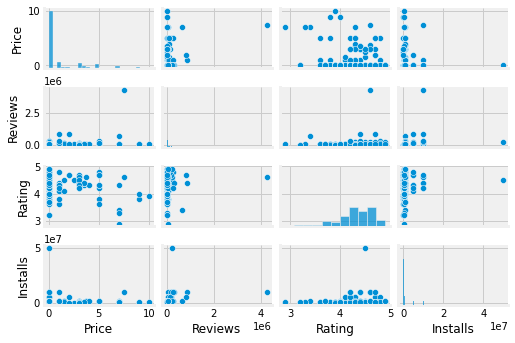

In [946]:
sns.pairplot(df, height=1.2, aspect=1.5);

# View the correlations

In [947]:
df.corr()

,Price,Reviews,Rating,Installs
Price,1.000000,0.275843,-0.199931,-0.056238
Reviews,0.275843,1.000000,0.093691,0.266461
Rating,-0.199931,0.093691,1.000000,0.109821
Installs,-0.056238,0.266461,0.109821,1.000000


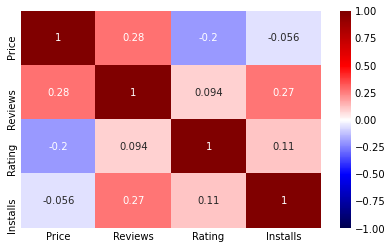

In [948]:
#corr matrix
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

# Change categorical variable to numerical

In [949]:
ctg_counts = df.Category.value_counts()
ctg_counts

AUTO_AND_VEHICLES    49
ART_AND_DESIGN       47
Action               14
Arcade               10
Simulation            6
Casual                4
Adventure             4
Educational           3
Strategy              3
BEAUTY                2
Puzzle                2
Role Playing          2
Racing                1
Board                 1
Name: Category, dtype: int64

In [950]:
other_ctg = list(ctg_counts[ctg_counts < 10].index) # "return the indcies for the nighbor counts less than 10"


df['Category'] = df['Category'].replace(other_ctg, 'Other') # "replace the categories having count less than 10 by other"


In [951]:
df=pd.get_dummies(df)

In [952]:
df.head()

,Price,Reviews,Rating,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_Action,Category_Arcade,Category_Other
0,7.49,4271539.0,4.6,10000000.0,0,0,0,1,0
1,6.99,653949.0,3.4,1000000.0,0,0,1,0,0
2,0.99,36378.0,4.1,500000.0,0,0,1,0,0
3,0.99,111562.0,4.3,1000000.0,0,0,0,0,1
4,4.99,122.0,4.2,500.0,0,0,0,0,1


# Separate our features from our target

In [953]:
X = df.loc[:,['Rating', 'Installs', 'Reviews']]

y = df['Price']

In [954]:
X_dummies = df.loc[:,['Rating', 'Installs', 'Reviews', 'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES', 'Category_Action','Category_Arcade','Category_Other']]

y = df['Price']

# Linear regression model

Used train test split with 25% test size and 75% train size

In [955]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42) #without dummies

# fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(f'Linear Regression for test R^2: {lr_model.score(X_train, y_train)}')
val_score = lr_model.score(X_val, y_val)
print(f'Linear Regression for test R^2: {val_score}')

Linear Regression for test R^2: 0.1690647353900907
Linear Regression for test R^2: 0.05297079090267931


In [956]:
X_train, X_val, y_train, y_val = train_test_split(X_dummies, y, test_size=0.25, random_state=42) # with dummies

# fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(f'Linear Regression for test R^2: {lr_model.score(X_train, y_train)}')
val_score = lr_model.score(X_val, y_val)
print(f'Linear Regression for test R^2: {val_score}')

Linear Regression for test R^2: 0.6327299243721343
Linear Regression for test R^2: 0.5980561751597702


# Feature Engineering

To improve model's performance 

In [957]:
X1 = X_dummies.copy()

X1['Rating'] = X1['Rating'] ** 2 # "adding quadratic terms to the data frame"

X1.head()

,Rating,Installs,Reviews,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_Action,Category_Arcade,Category_Other
0,21.16,10000000.0,4271539.0,0,0,0,1,0
1,11.56,1000000.0,653949.0,0,0,1,0,0
2,16.81,500000.0,36378.0,0,0,1,0,0
3,18.49,1000000.0,111562.0,0,0,0,0,1
4,17.64,500.0,122.0,0,0,0,0,1


In [958]:
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size=0.25, random_state=42)
    
#fit linear regression to training data
lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)
print(f'Linear Regression for train R^2:{lr_model2.score(X_train, y_train)}')
val_score = lr_model2.score(X_val, y_val)
print(f'Linear Regression for test R^2: {val_score}')

Linear Regression for train R^2:0.6297709735778613
Linear Regression for test R^2: 0.6020564981216516


In [959]:
X2 = X1.copy()

# multiplicative interaction
X2['Rating_x_installs'] = X2['Rating'] * X2['Installs']
X2['Rating_x_reviews'] = X2['Rating'] * X2['Reviews']
#X2['Rating_/_installs'] = X2['Rating'] / X2['Installs']
#X2['Rating_/_reviews'] = X2['Rating'] / X2['Reviews']

In [960]:
X_train, X_val, y_train, y_val = train_test_split(X2, y, test_size=0.25, random_state=42)
    
#fit linear regression to training data
lr_model3 = LinearRegression()
fit2 = lr_model3.fit(X_train, y_train)
print(f'Linear Regression for train R^2: {lr_model3.score(X_train, y_train)}')
val_score = lr_model3.score(X_val, y_val)
print(f'Linear Regression for test R^2: {val_score}')

Linear Regression for train R^2: 0.6356434042770405
Linear Regression for test R^2: 0.6080677905903289


In [961]:
import statsmodels.api as sm
# Create your model
model = sm.OLS(y, X2)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     26.86
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           2.57e-26
Time:                        12:55:26   Log-Likelihood:                -250.30
No. Observations:                 148   AIC:                             520.6
Df Residuals:                     138   BIC:                             550.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Rating                        -0.1359      0.040     -3.404      0.001      -0.215      -0.057
Installs                   -8.783e-07   5.45e-07     -1.610      0.110   -1.96e-06       2e-07
Reviews                     6.292e-06   4.95e-06      1.272      0.206   -3.49e-06    1.61e-05
Category_ART_AND_DESIGN        2.5689      0.775      3.313      0.001       1.036       4.102
Category_AUTO_AND_VEHICLES     2.5650      0.775      3.311      0.001       1.033       4.097
Category_Action                6.1410      0.812      7.561      0.000       4.535       7.747
Category_Arcade                4.3456      0.848      5.125      0.000       2.669       6.022
Category_Other                 5.8750      0.804      7.305      0.000       4.285       7.465
Rating_x_installs           4.281e-08   2.71e-08      1.579      0.117   -1.08e-08    9.64e-08
Rating_x_reviews           -2.408e-07   2.36e-07     -1.018      0.310   -7.08e-07    2.27e-07
==============================================================================
Omnibus:                       46.642   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.517
Skew:                           1.039   Prob(JB):                     5.26e-46
Kurtosis:                       8.431   Cond. No.                     1.46e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ridge model

We tried to run the model different x and the one that performed best with the linear 
regression model was the best for the ridge model too

In [962]:
X_train, X_val, y_train, y_val = train_test_split(X_dummies, y, test_size=0.25, random_state=10)
#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

lm_reg = Ridge(alpha=1)
#validate
lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_test_scaled, y_val):.3f}')

Ridge Regression val R^2: 0.531


In [963]:
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size=0.25, random_state=10)
#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

lm_reg = Ridge(alpha=1)
#validate
lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_test_scaled, y_val):.3f}')

Ridge Regression val R^2: 0.526


In [964]:
X_train, X_val, y_train, y_val = train_test_split(X2, y, test_size=0.25, random_state=10)
#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

lm_reg = Ridge(alpha=1)
#validate
lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_test_scaled, y_val):.3f}')

Ridge Regression val R^2: 0.540


In [965]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    

    lr_model3.fit(x, y)
    pred = lr_model3.predict(x) # "regression prediction"


    plt.subplot(1, 3, 1)
    plt.scatter(x,y) # "scatter"
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res) # "scatter supposed to have no pattern"
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt) # "normal qq plot"
    plt.title("Normal Q-Q plot")

In [966]:
# Generate fake data
s = 500
x = np.random.uniform(low=-5, high=5, size=s)

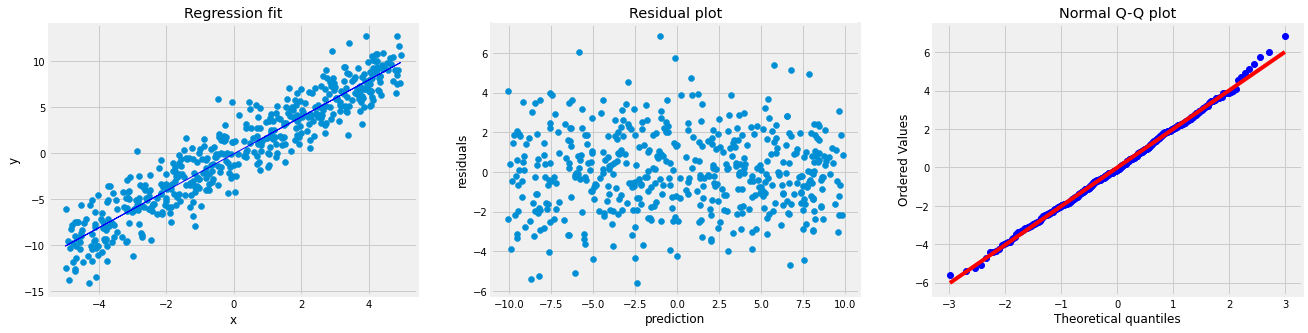

In [967]:
epsilon = 2*np.random.randn(s)
beta = 2
y = beta*x + epsilon

diagnostic_plot(x.reshape(s,1), y) # we reshape x to turn it into a tall column

# Assumption: residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean

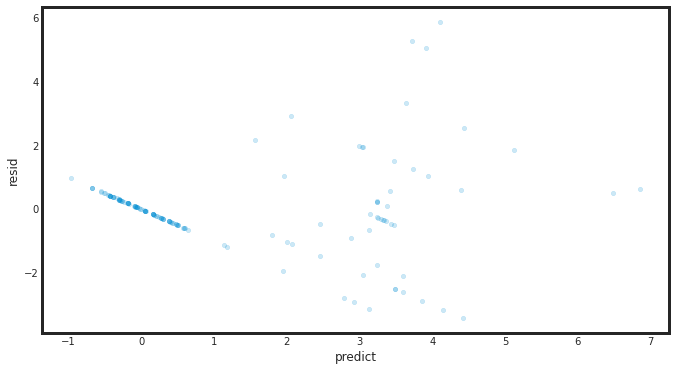

In [968]:
# create residual plot
df['predict']=fit.predict(X2)
df['resid']=df.Price-df.predict # "residuals"
with sns.axes_style('white'):
    plot=df.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

In [969]:
df.head()

,Price,Reviews,Rating,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_Action,Category_Arcade,Category_Other,predict,resid
0,7.49,4271539.0,4.6,10000000.0,0,0,0,1,0,6.859630,0.630370
1,6.99,653949.0,3.4,1000000.0,0,0,1,0,0,6.481079,0.508921
2,0.99,36378.0,4.1,500000.0,0,0,1,0,0,3.858637,-2.868637
3,0.99,111562.0,4.3,1000000.0,0,0,0,0,1,3.480518,-2.490518
4,4.99,122.0,4.2,500.0,0,0,0,0,1,3.477749,1.512251


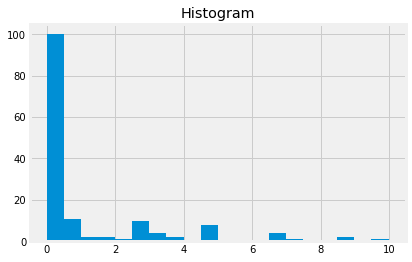

In [970]:
# inspect histogram
df.Price.hist(bins=20)
plt.title('Histogram');

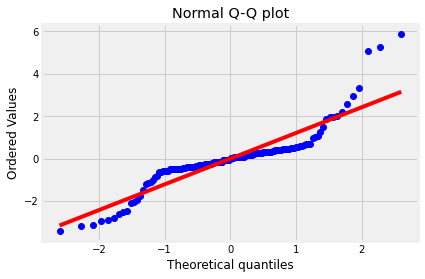

In [971]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Assumption 3: error terms must have constant variance


In [972]:
df.describe()

,Price,Reviews,Rating,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_Action,Category_Arcade,Category_Other,predict,resid
count,148.000000,1.480000e+02,148.000000,1.480000e+02,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,1.480000e+02
mean,1.184324,7.566080e+04,4.298649,1.379970e+06,0.317568,0.331081,0.094595,0.067568,0.189189,1.184324,-3.614535e-12
std,2.185355,3.678760e+05,0.375434,4.616549e+06,0.467111,0.472200,0.293648,0.251855,0.392989,1.743650,1.317369e+00
min,0.000000,2.600000e+01,2.900000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-0.969158,-3.429207e+00
25%,0.000000,6.382500e+02,4.100000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-0.178796,-4.134859e-01
50%,0.000000,4.920500e+03,4.300000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.299016,-1.240389e-02
75%,1.115000,3.644325e+04,4.600000,1.000000e+06,1.000000,1.000000,0.000000,0.000000,0.000000,3.043017,3.829808e-01
max,9.990000,4.271539e+06,4.900000,5.000000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,6.859630,5.886458e+00


In [973]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     26.86
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           2.57e-26
Time:                        12:55:37   Log-Likelihood:                -250.30
No. Observations:                 148   AIC:                             520.6
Df Residuals:                     138   BIC:                             550.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Rating                        -0.1359      0.040     -3.404      0.001      -0.215      -0.057
Installs                   -8.783e-07   5.45e-07     -1.610      0.110   -1.96e-06       2e-07
Reviews                     6.292e-06   4.95e-06      1.272      0.206   -3.49e-06    1.61e-05
Category_ART_AND_DESIGN        2.5689      0.775      3.313      0.001       1.036       4.102
Category_AUTO_AND_VEHICLES     2.5650      0.775      3.311      0.001       1.033       4.097
Category_Action                6.1410      0.812      7.561      0.000       4.535       7.747
Category_Arcade                4.3456      0.848      5.125      0.000       2.669       6.022
Category_Other                 5.8750      0.804      7.305      0.000       4.285       7.465
Rating_x_installs           4.281e-08   2.71e-08      1.579      0.117   -1.08e-08    9.64e-08
Rating_x_reviews           -2.408e-07   2.36e-07     -1.018      0.310   -7.08e-07    2.27e-07
==============================================================================
Omnibus:                       46.642   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.517
Skew:                           1.039   Prob(JB):                     5.26e-46
Kurtosis:                       8.431   Cond. No.                     1.46e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""